In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [2]:
consoles = pd.read_csv('../Data/best-selling_game_consoles.csv')
consoles.head(2)

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Units_number,Price,Price_Inflation,Revenue,Remarks,Mods
0,Telstar,Dedicated,Coleco,1976,1978,1.0,1000000.0,$50.00,$285.00,"$50,000,000.00",Final sales are greater than 1 million,"1,000,000"
1,Atari 2600,Home,Atari,1977,1992,30.0,30000000.0,$199.00,"$1,064.00","$5,970,000,000.00",NaN,NaN


Data Cleaning done in excel: I added the 'Price' column based on https://www.inflationstation.net/, I used https://www.in2013dollars.com/ to find inflation numbers based on 'Price', giving me my 'Price_Inflation'. I then added the 'Mods' column to multiply the 'Units Sold' column by it and get the 'Units_number' column. Then some simple multiplication with 'Units_number' and 'Price' led me to an estimated 'Revenue'. 

In [3]:
consoles = consoles.drop(columns= 'Mods')

In [4]:
consoles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          49 non-null     object 
 1   Type                  49 non-null     object 
 2   Company               49 non-null     object 
 3   Released Year         49 non-null     int64  
 4   Discontinuation Year  49 non-null     int64  
 5   Units sold (million)  49 non-null     float64
 6   Units_number          49 non-null     float64
 7   Price                 49 non-null     object 
 8   Price_Inflation       49 non-null     object 
 9   Revenue               49 non-null     object 
 10  Remarks               16 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ KB


In [5]:
consoles['Price'] = consoles['Price'].str.replace('$', '').astype(float)

In [6]:
consoles['Price_Inflation'] = consoles['Price_Inflation'].str.replace('$', '').str.replace(',', '').astype(float)

In [7]:
consoles['Revenue'] = consoles['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)

In [8]:
consoles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          49 non-null     object 
 1   Type                  49 non-null     object 
 2   Company               49 non-null     object 
 3   Released Year         49 non-null     int64  
 4   Discontinuation Year  49 non-null     int64  
 5   Units sold (million)  49 non-null     float64
 6   Units_number          49 non-null     float64
 7   Price                 49 non-null     float64
 8   Price_Inflation       49 non-null     float64
 9   Revenue               49 non-null     float64
 10  Remarks               16 non-null     object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.3+ KB


Question: The real cost of gaming over time, adjusted for inflation and is it cheaper or more expensive now than in the 80s (40 years)? 

In [9]:
sortedPrice = consoles.sort_values('Price')

<Axes: xlabel='Released Year', ylabel='Price'>

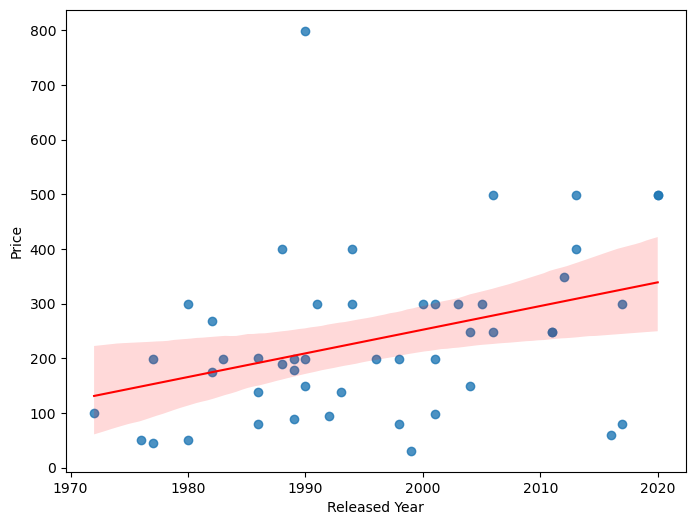

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=sortedPrice["Released Year"],
    y=sortedPrice["Price"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)

In [11]:
fig.savefig('PricesUp.png')

<Axes: xlabel='Released Year', ylabel='Price_Inflation'>

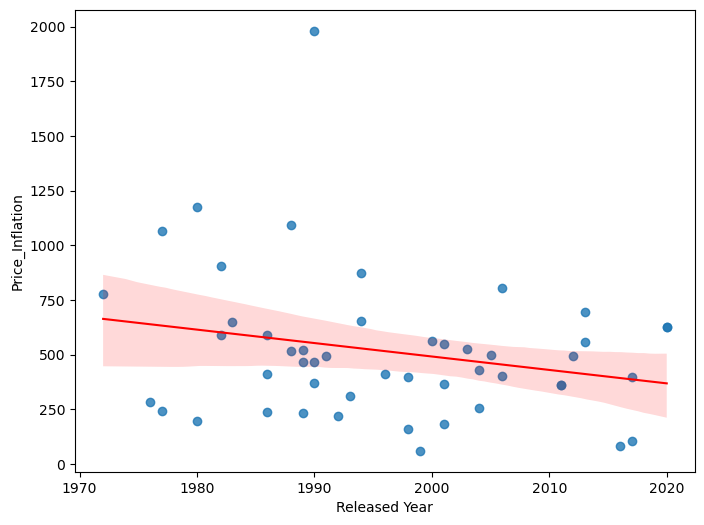

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=sortedPrice["Released Year"],
    y=sortedPrice["Price_Inflation"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)

<Axes: xlabel='Released Year', ylabel='Units sold (million)'>

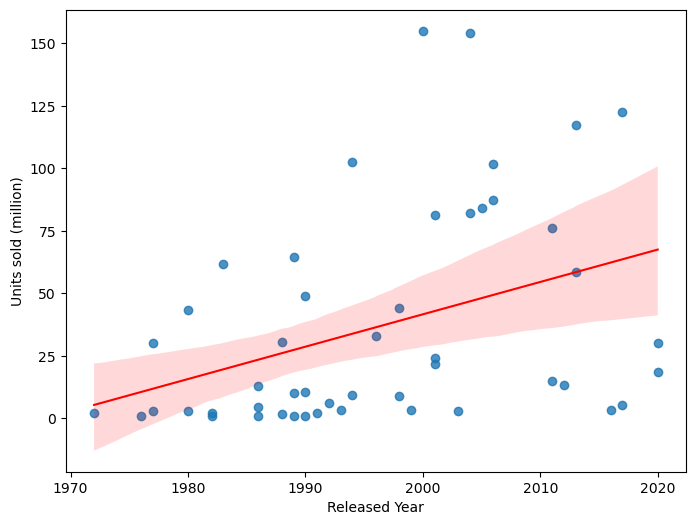

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=sortedPrice["Released Year"],
    y=sortedPrice["Units sold (million)"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)

In [14]:
fig.savefig('InflationDown.png')

Analyze: Get all of the consoles between decades and find out how many consoles launched that decade, also find out revenue, and compare that over time.

In [15]:
consoles['Decade'] = (consoles['Released Year'] // 10) * 10

In [16]:
consoles.tail()

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Units_number,Price,Price_Inflation,Revenue,Remarks,Decade
44,NES Classic Edition,Dedicated,Nintendo,2016,2018,3.56,3560000.0,60.0,81.0,2.136000e+08,NaN,2010
45,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,122550000.0,299.0,395.0,3.664245e+10,NaN,2010
46,Super NES Classic Edition,Dedicated,Nintendo,2017,2018,5.28,5280000.0,80.0,106.0,4.224000e+08,NaN,2010
47,PlayStation 5,Home,Sony,2020,0,30.00,30000000.0,499.0,625.0,1.497000e+10,NaN,2020
48,Xbox Series X/S,Home,Microsoft,2020,0,18.50,18500000.0,499.0,625.0,9.231500e+09,Approximately around 18.5 million,2020


In [17]:
pd.options.display.float_format = '{:,.0f}'.format

In [18]:
consoles['Decade'].value_counts()

Decade
1980    13
1990    12
2000    10
2010     8
1970     4
2020     2
Name: count, dtype: int64

In [19]:
revenue_by_decade = (consoles.groupby('Decade', as_index=False)['Revenue'].sum().sort_values('Decade'))

In [20]:
revenue_by_decade

,Decade,Revenue
0,1970,"6,355,000,000"
1,1980,"33,585,300,000"
2,1990,"60,201,130,000"
3,2000,"204,215,200,000"
4,2010,"140,609,250,000"
5,2020,"24,201,500,000"


<Axes: xlabel='Decade'>

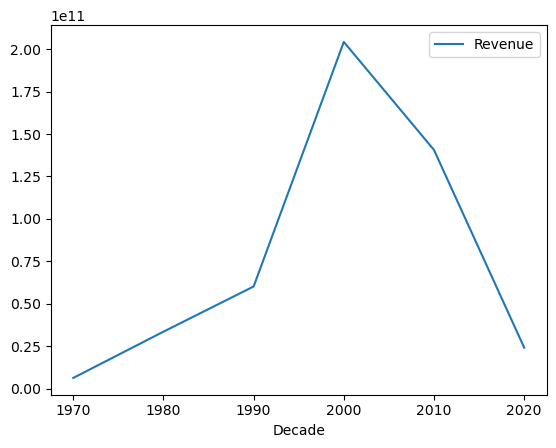

In [21]:
revenue_by_decade.plot(kind = 'line', x='Decade', y='Revenue')

In [22]:
consoles['Type'].value_counts()

Type
Home                   29
Handheld               12
Dedicated               4
Home console add-on     3
Hybrid                  1
Name: count, dtype: int64

In [23]:
base_price = consoles.loc[consoles['Released Year'] == 1976, 'Price'].iloc[0]

In [24]:
base_price

np.float64(50.0)

In [25]:
consoles['Total_Inflation'] = ((consoles['Price'] / base_price) - 1) * 100

In [26]:
consoles

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Units_number,Price,Price_Inflation,Revenue,Remarks,Decade,Total_Inflation
0,Telstar,Dedicated,Coleco,1976,1978,1,"1,000,000",50,285,"50,000,000",Final sales are greater than 1 million,1970,0
1,Atari 2600,Home,Atari,1977,1992,30,"30,000,000",199,"1,064","5,970,000,000",NaN,1970,298
2,Color TV-Game,Dedicated,Nintendo,1977,1980,3,"3,000,000",45,241,"135,000,000",NaN,1970,-10
3,Magnavox Odyssey,Home,Magnavox/Philips,1972,1975,2,"2,000,000",100,775,"200,000,000",NaN,1970,100
4,Game & Watch,Handheld,Nintendo,1980,1991,43,"43,400,000",50,197,"2,170,000,000",NaN,1980,0
5,Intellivision,Home,Mattel,1980,1990,3,"3,000,000",299,"1,176","897,000,000",NaN,1980,498
6,Atari 5200,Home,Atari,1982,1984,1,"1,000,000",269,903,"269,000,000",Final sales are greater than 1 million,1980,438
7,ColecoVision,Home,Coleco,1982,1985,2,"2,000,000",175,588,"350,000,000",Final sales are greater than 2 million,1980,250
8,NES,Home,Nintendo,1983,2003,62,"61,910,000",199,647,"12,320,090,000",NaN,1980,298
9,Atari 7800,Home,Atari,1986,1991,1,"1,000,000",139,411,"139,000,000",Final sales are greater than 1 million,1980,178


<Axes: xlabel='Released Year', ylabel='Price_Inflation'>

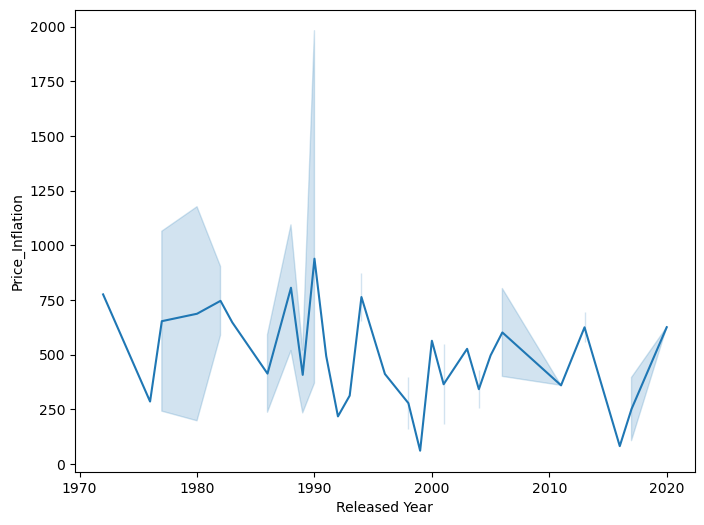

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(
    x=consoles["Released Year"],
    y=consoles["Price_Inflation"],
    ax=ax
)

As a whole, there is not a ton of movement on inflation for gaming. For hardware, it has stayed relatively the same but that just means it was more expensive to game years ago vs today. Software has doubled as initital games in the 80's were 30-40 dollars and run 70 dollars today.

<Axes: xlabel='Released Year'>

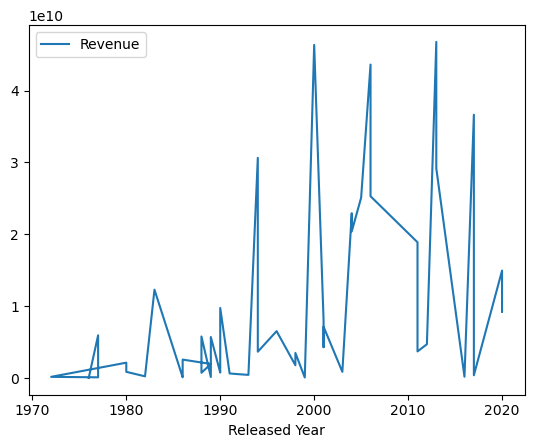

In [28]:
consoles.plot(kind = 'line', x='Released Year', y='Revenue')

In [29]:
revenue_by_year = (consoles.groupby('Released Year', as_index=False)['Revenue'].sum().sort_values('Released Year'))

<Axes: xlabel='Released Year'>

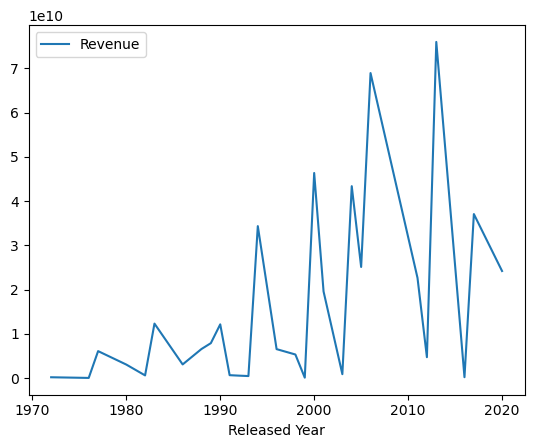

In [30]:
revenue_by_year.plot(kind = 'line', x='Released Year', y='Revenue')

Text(0.5, 1.0, 'Decade Sales')

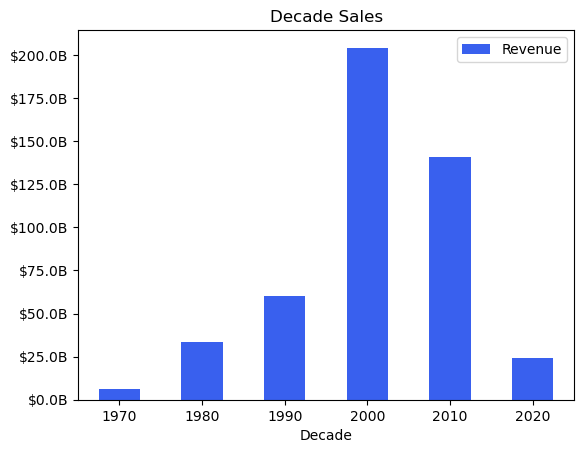

In [64]:
revenue_by_decade = (consoles.groupby('Decade', as_index=False)['Revenue'].sum().sort_values('Decade'))
ax = revenue_by_decade.plot(kind = 'bar', x='Decade', y='Revenue', color = '#3960EE')
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params(axis='x', rotation=0)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))
plt.title('Decade Sales')

In [65]:
fig = ax.figure
fig.savefig('DecadeSales.png')

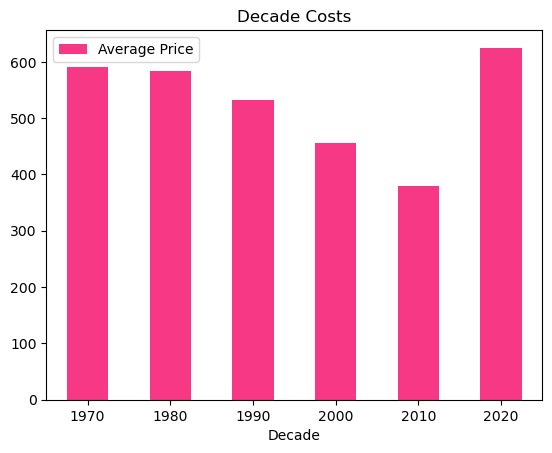

In [66]:
costs_by_decade = (consoles.groupby('Decade', as_index=False)['Price_Inflation'].mean().sort_values('Decade'))
ax = costs_by_decade.plot(kind = 'bar', x='Decade', y='Price_Inflation', color = '#F73884')
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params(axis='x', rotation=0)
plt.title('Decade Costs')
plt.legend(['Average Price'])

In [67]:
fig = ax.figure
fig.savefig('DecadeCosts.png')

In [68]:
consoles['Units sold (million)'].sum()

np.float64(1802.02)

In [69]:
total_unit_decade = (consoles.groupby('Decade', as_index=False)['Units sold (million)'].sum().sort_values('Decade'))
total_unit_decade

,Decade,Units sold (million)
0,1970,36
1,1980,238
2,1990,274
3,2000,794
4,2010,412
5,2020,48
